# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [231]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [232]:
# loading the data:
data = pd.read_csv('../data/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [233]:
# Your code here:
data.info()
# All int64, no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [234]:
# Channel and region seem to be ids, other are yearly sales
cols_id = ['Channel', 'Region']
cols_sales = data.columns.to_list()
cols_sales.remove('Channel')
cols_sales.remove('Region')

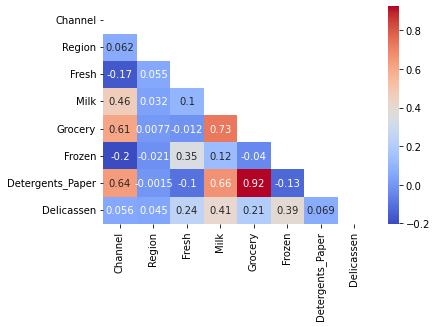

In [235]:
import seaborn as sns

mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot = True, mask=mask);
# High-correlation (> 0.9) between Detergents_Paper and Grocery

In [236]:
data.describe()
# Max values seem to be outliers
# Very different value ranges

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_71779/1639844669.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show();


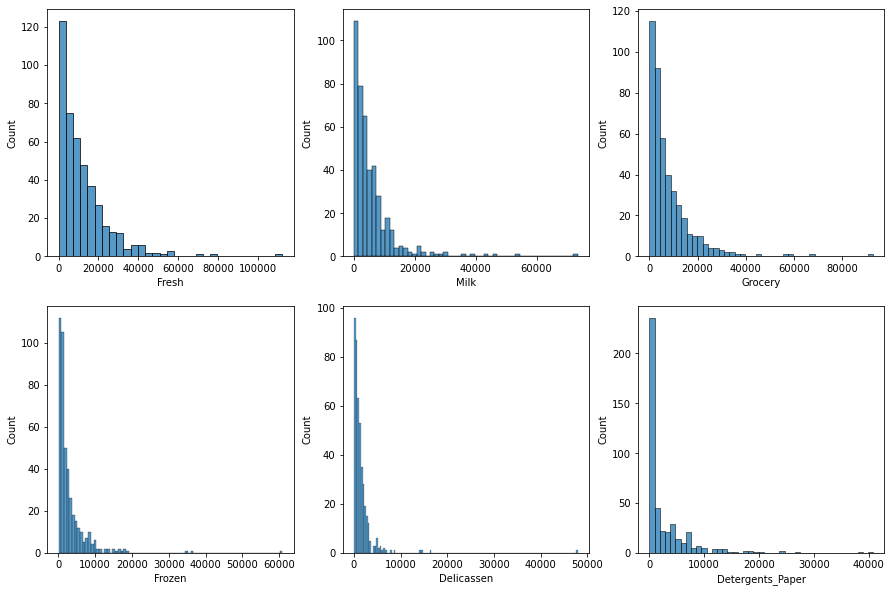

In [237]:
# HISTPLOTS

f, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(x = data.Fresh , ax=axes[0, 0], )
sns.histplot(x = data.Milk , ax=axes[0, 1])
sns.histplot(x = data.Grocery , ax=axes[0, 2])
sns.histplot(x = data.Frozen , ax=axes[1, 0])
sns.histplot(x = data.Delicassen , ax=axes[1, 1])
sns.histplot(x = data.Detergents_Paper , ax=axes[1, 2])
f.show();

In [238]:
# # Right-skewed distribution.

/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_71779/2512093243.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show();


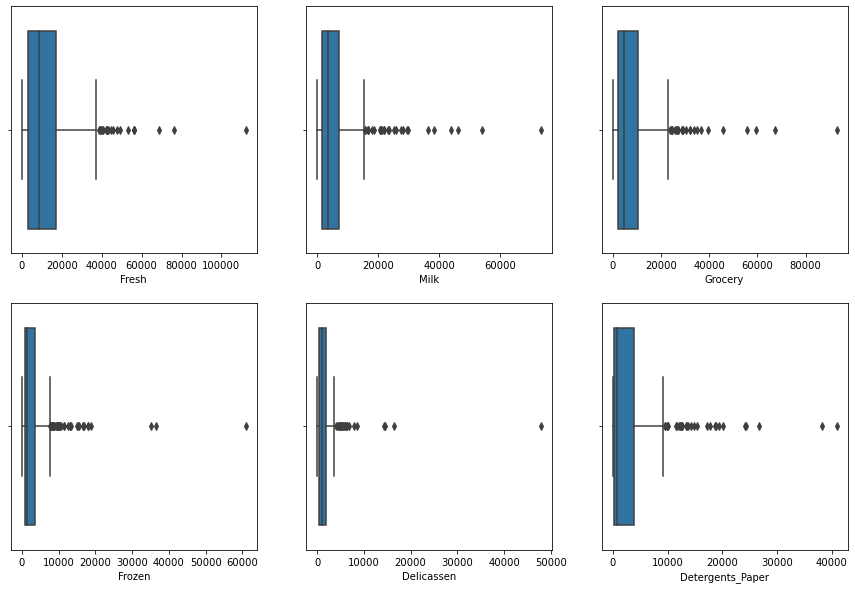

In [239]:
# BOXPLOTS

f, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(x = data.Fresh , ax=axes[0, 0], )
sns.boxplot(x = data.Milk , ax=axes[0, 1])
sns.boxplot(x = data.Grocery , ax=axes[0, 2])
sns.boxplot(x = data.Frozen , ax=axes[1, 0])
sns.boxplot(x = data.Delicassen , ax=axes[1, 1])
sns.boxplot(x = data.Detergents_Paper , ax=axes[1, 2])
f.show();

In [240]:
# Outliers in every column

In [241]:
# PARETO

nb_rows = data.shape[0]

share_top_20pct = dict()

for col in cols_sales:
    data.sort_values(by=col,ascending=False, inplace = True)
    share_top_20pct[col]=data[col][:int(nb_rows * 0.2)].sum()/data[col].sum()
    print(f'\nThe top 20% clients of {col} account for ca. {share_top_20pct[col]:.0%} of the total sales of this category')
    if share_top_20pct[col] < 0.8:
        print(f'{col} category does not follow the Pareto principle')
    else:
        print(f'The {col} category follows the Pareto principle')

# Do not follow Pareto principle in any category


The top 20% clients of Fresh account for ca. 53% of the total sales of this category
Fresh category does not follow the Pareto principle

The top 20% clients of Milk account for ca. 56% of the total sales of this category
Milk category does not follow the Pareto principle

The top 20% clients of Grocery account for ca. 56% of the total sales of this category
Grocery category does not follow the Pareto principle

The top 20% clients of Frozen account for ca. 62% of the total sales of this category
Frozen category does not follow the Pareto principle

The top 20% clients of Detergents_Paper account for ca. 70% of the total sales of this category
Detergents_Paper category does not follow the Pareto principle

The top 20% clients of Delicassen account for ca. 57% of the total sales of this category
Delicassen category does not follow the Pareto principle


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [242]:
# High correlation between Grocery and Detergents_Paper, we keep Grocery
data.drop('Detergents_Paper', axis = 1, inplace = True)

In [243]:
# Outliers
# We want to find similarities between multiple datapoints (and group them based on these similarities):
# by definition, outliers do not have similarities with other datapoints
# so we will drop them based on IQR and Z-Score


In [244]:
# IQR

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

Channel           1.00
Region            1.00
Fresh         13806.00
Milk           5657.25
Grocery        8502.75
Frozen         2812.00
Delicassen     1412.00
dtype: float64

In [245]:
IQR_threshold = 1.5
mask_outliers_IQR = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

data = data[~mask_outliers_IQR]
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
166,2,3,4822,6721,9170,993,3637
267,1,1,20893,1222,2576,3975,3628
315,2,2,1479,14982,11924,662,3508
138,1,3,13537,4257,5034,155,3271
156,2,3,3830,5291,14855,317,3182
...,...,...,...,...,...,...,...
154,1,3,622,55,137,75,8
233,1,1,964,4984,3316,937,7
142,1,3,37036,7152,8253,2995,3
128,1,3,140,8847,3823,142,3


In [246]:
# Z-SCORE
# (Numerical measurement that describes a value's relationship to the mean of a group of values, expressed in terms of standard deviations from the mean)

from scipy.stats import zscore
z = zscore(data)
z # Dataframe

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
166,1.516895,0.596973,-0.562555,0.716422,0.551972,-0.507446,3.165559
267,-0.659241,-1.956119,1.416376,-0.867294,-0.670708,1.252099,3.154686
315,1.516895,-0.679573,-0.974201,3.095596,1.062628,-0.702754,3.009713
138,-0.659241,0.596973,0.510582,0.006788,-0.214938,-1.001912,2.723391
156,1.516895,0.596973,-0.684707,0.304581,1.606103,-0.906323,2.615869
...,...,...,...,...,...,...,...
154,-0.659241,0.596973,-1.079730,-1.203391,-1.122955,-1.049116,-1.218670
233,-0.659241,-1.956119,-1.037617,0.216165,-0.533494,-0.540489,-1.219878
142,-0.659241,0.596973,3.404173,0.840550,0.381939,0.673845,-1.224710
128,-0.659241,0.596973,-1.139082,1.328711,-0.439485,-1.009583,-1.224710


In [247]:
data = data[(np.abs(z) < 3).all(axis=1)] # Using z-score of 3

In [248]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
138,1,3,13537,4257,5034,155,3271
156,2,3,3830,5291,14855,317,3182
18,2,3,18601,6327,10099,2205,3181
89,1,3,24904,3836,5330,3443,3178
351,2,3,1210,10044,22294,1741,3137
...,...,...,...,...,...,...,...
184,1,3,327,918,4710,74,11
154,1,3,622,55,137,75,8
233,1,1,964,4984,3316,937,7
128,1,3,140,8847,3823,142,3


/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_71779/2084812717.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show();


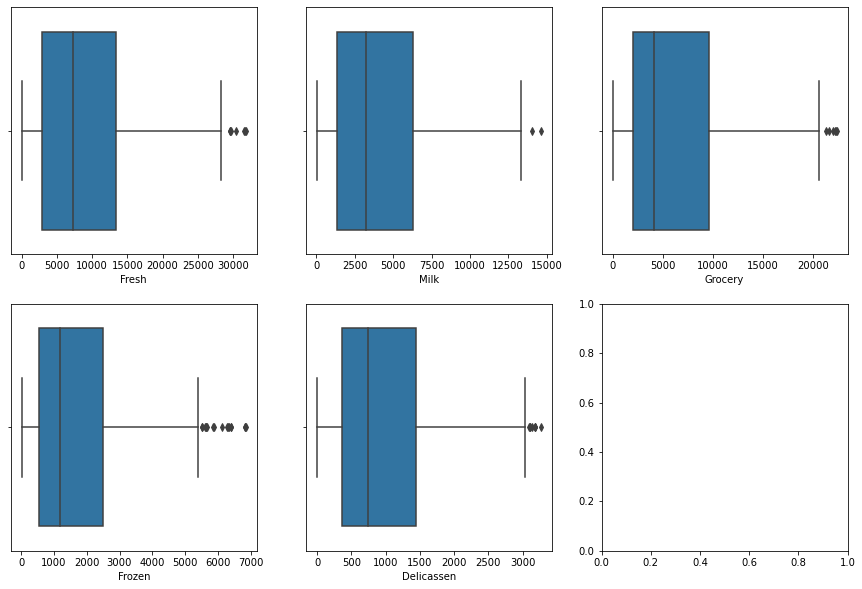

In [249]:
# BOXPLOTS

f, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(x = data.Fresh , ax=axes[0, 0], )
sns.boxplot(x = data.Milk , ax=axes[0, 1])
sns.boxplot(x = data.Grocery , ax=axes[0, 2])
sns.boxplot(x = data.Frozen , ax=axes[1, 0])
sns.boxplot(x = data.Delicassen , ax=axes[1, 1])
f.show();
# Much better.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [250]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

std_scaler = StandardScaler()
data_scaled = pd.DataFrame(std_scaler.fit_transform(data), columns=data.columns)
data_scaled


,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
0,-0.662266,0.589492,0.579401,0.022439,-0.210145,-1.014247,2.882107
1,1.509967,0.589492,-0.691713,0.324654,1.617216,-0.911484,2.769638
2,1.509967,0.589492,1.242523,0.627454,0.732283,0.286142,2.768374
3,-0.662266,0.589492,2.067890,-0.100610,-0.155069,1.071449,2.764583
4,1.509967,0.589492,-1.034798,1.713852,3.001366,-0.008190,2.712771
...,...,...,...,...,...,...,...
323,-0.662266,0.589492,-1.150425,-0.953478,-0.270430,-1.065628,-1.237550
324,-0.662266,0.589492,-1.111795,-1.205714,-1.121313,-1.064994,-1.241341
325,-0.662266,-1.988554,-1.067011,0.234925,-0.529807,-0.518196,-1.242605
326,-0.662266,0.589492,-1.174912,1.363995,-0.435471,-1.022493,-1.247659


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [251]:
# Your code here:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(data_scaled)

KMeans()

Count the values in `labels`.

In [252]:
# Your code here:
data['labels']=kmeans.labels_
data.labels.value_counts()
# 8 clusters (default) of size 25-83 datapoints

/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_71779/1311559289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['labels']=kmeans.labels_


4    58
2    46
7    45
1    43
3    38
0    35
6    35
5    28
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [253]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.5)
dbscan.fit(data_scaled)

DBSCAN()

Count the values in `labels_DBSCAN`.

In [254]:
# Your code here
data['labels_DBSCAN']=dbscan.labels_
data.labels_DBSCAN.value_counts()
# 2 labels with 303 datapoints in one, 25 in the other

/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_71779/1698187501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['labels_DBSCAN']=dbscan.labels_


-1    303
 0     25
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_71779/4167205458.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show();


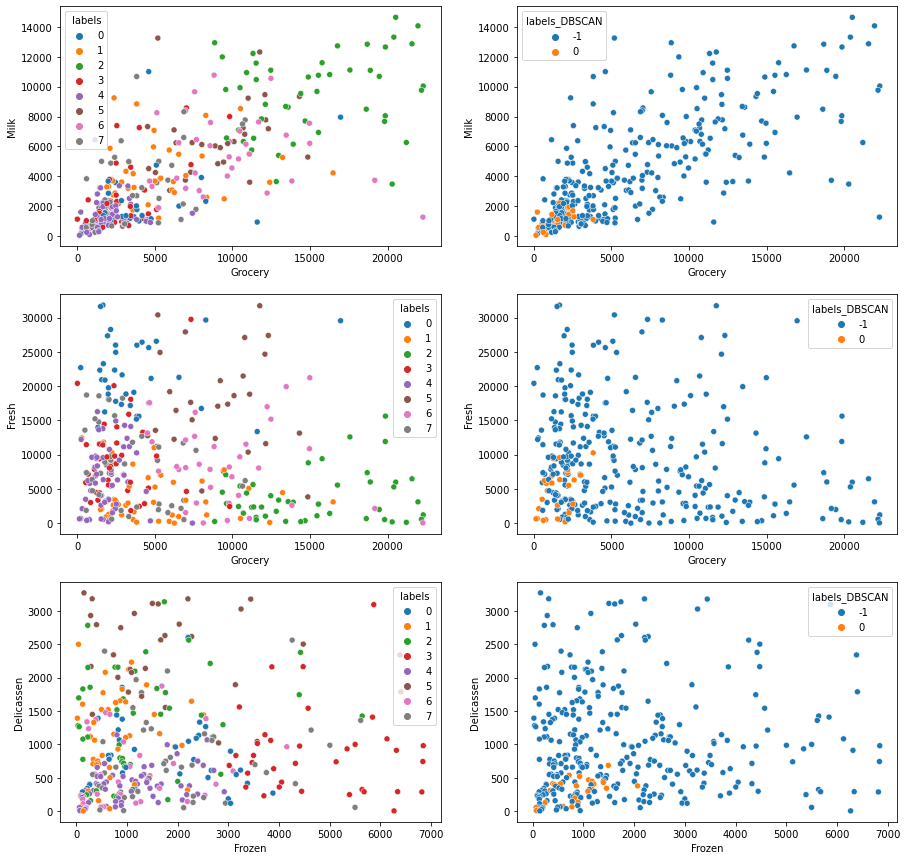

In [270]:
# We already dropped Detergents_Paper

cols_pairs_to_visualise = [['Grocery', 'Milk'], ['Grocery', 'Fresh'], ['Frozen', 'Delicassen']]

f, axs = plt.subplots(3, 2, figsize=(15, 15))

for i, cols_pairs in enumerate(cols_pairs_to_visualise):
    sns.scatterplot(data = data, x = cols_pairs[0], y=cols_pairs[1], hue = 'labels', ax=axs[i, 0], palette = sns.color_palette(n_colors = len(data.labels.unique())))
    sns.scatterplot(data = data, x = cols_pairs[0], y=cols_pairs[1], hue = 'labels_DBSCAN', ax=axs[i,1], palette = sns.color_palette(n_colors = len(data.labels_DBSCAN.unique())))

f.show();

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [256]:
# See above


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [257]:
# See above

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [271]:
# Your code here:
data.groupby('labels').mean()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen,labels_DBSCAN
labels,,,,,,,,
0,1.000000,2.485714,21938.657143,2265.400000,3725.285714,1694.257143,843.142857,-1.000000
1,1.000000,2.953488,3840.023256,4065.558140,5138.441860,819.139535,1117.581395,-1.000000
2,1.978261,2.565217,3713.869565,9564.304348,15271.500000,1330.521739,1331.673913,-1.000000
3,1.000000,2.710526,9120.289474,2476.105263,2766.157895,4796.947368,942.315789,-1.000000
4,1.000000,2.948276,6556.000000,1393.896552,1993.948276,1127.396552,402.603448,-0.568966
5,1.642857,2.857143,17716.035714,6521.357143,8941.678571,1541.321429,2460.535714,-1.000000
6,2.000000,2.828571,8660.057143,5371.485714,9717.457143,1126.200000,632.771429,-1.000000
7,1.044444,1.088889,7979.244444,2922.466667,3478.422222,1984.666667,795.488889,-1.000000


In [272]:
data.groupby('labels_DBSCAN').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen,labels
labels_DBSCAN,,,,,,,,
-1,1.330033,2.50495,9486.217822,4432.39934,6547.49505,1830.234323,1044.587459,3.452145
0,1.000000,3.00000,4580.960000,1123.92000,1508.24000,828.880000,332.440000,4.000000


Which algorithm appears to perform better?

In [259]:
# Both algorithms are not very convincing
# However DBSCAN's clusters are less dispersed.

# Challenge 6 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_71779/2977698606.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show();


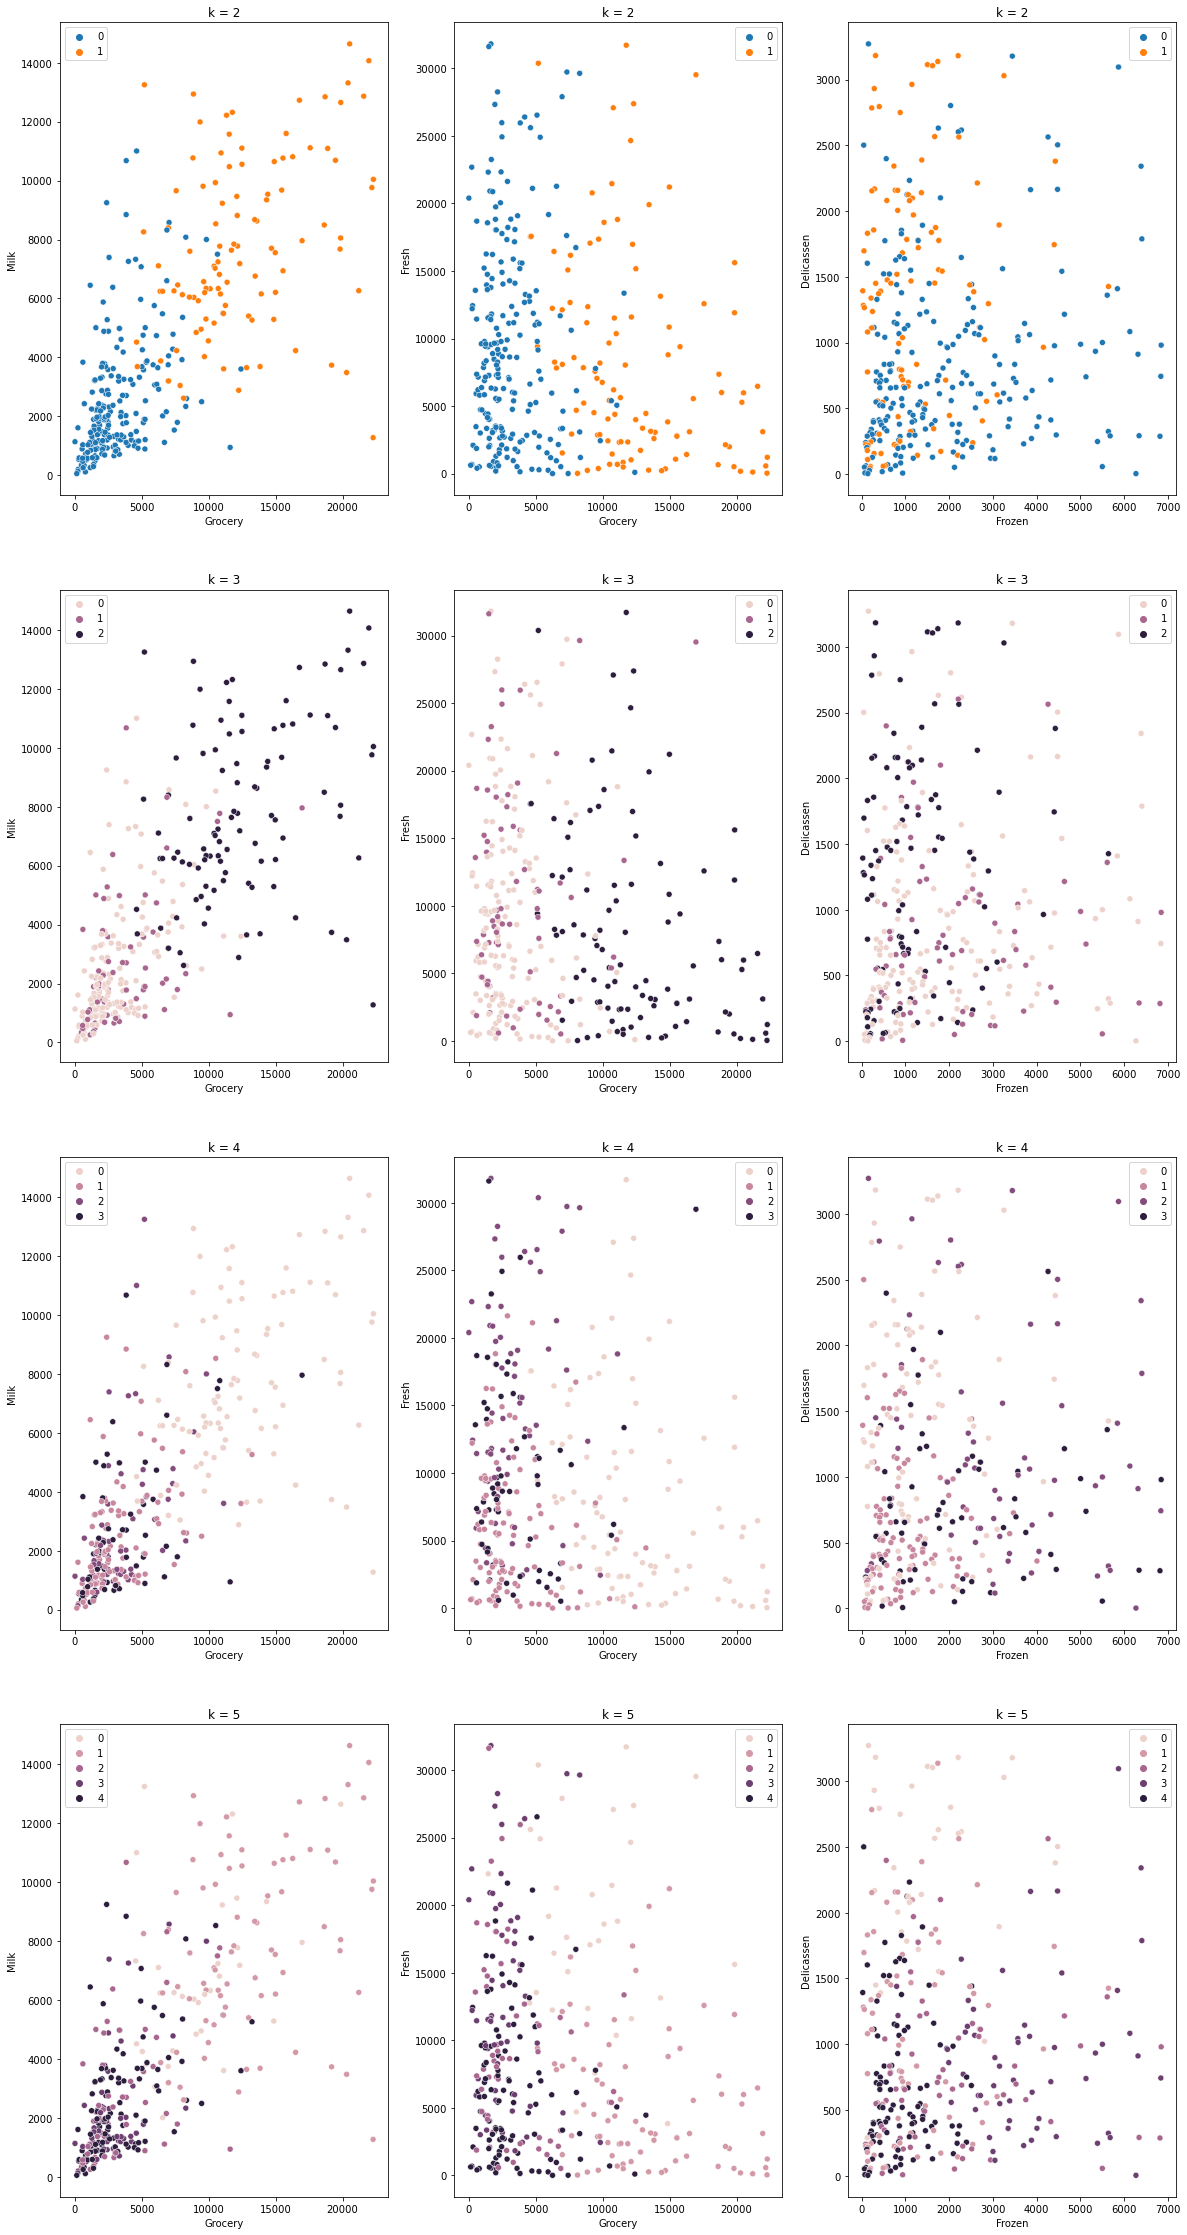

In [279]:
min_k = 2
max_k = 5

kmeans = dict()

f, axs = plt.subplots(max_k + 1 - min_k, len(cols_pairs_to_visualise), figsize=(20, 40))


for k in range(min_k, max_k + 1):
    kmeans[k] = KMeans(n_clusters=k)
    kmeans[k].fit(data_scaled)
    for i, cols_pairs in enumerate(cols_pairs_to_visualise):
        sns.scatterplot(data = data, x = cols_pairs[0], y=cols_pairs[1], hue = kmeans[k].labels_, ax=axs[k-min_k, i])
        axs[k-min_k, i].set_title(f'k = {k}')

f.tight_layout
f.show();

In [261]:
# 2 seems to be the number of clusters that best work for K-Means.

# Challenge 7 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_71779/1122873647.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


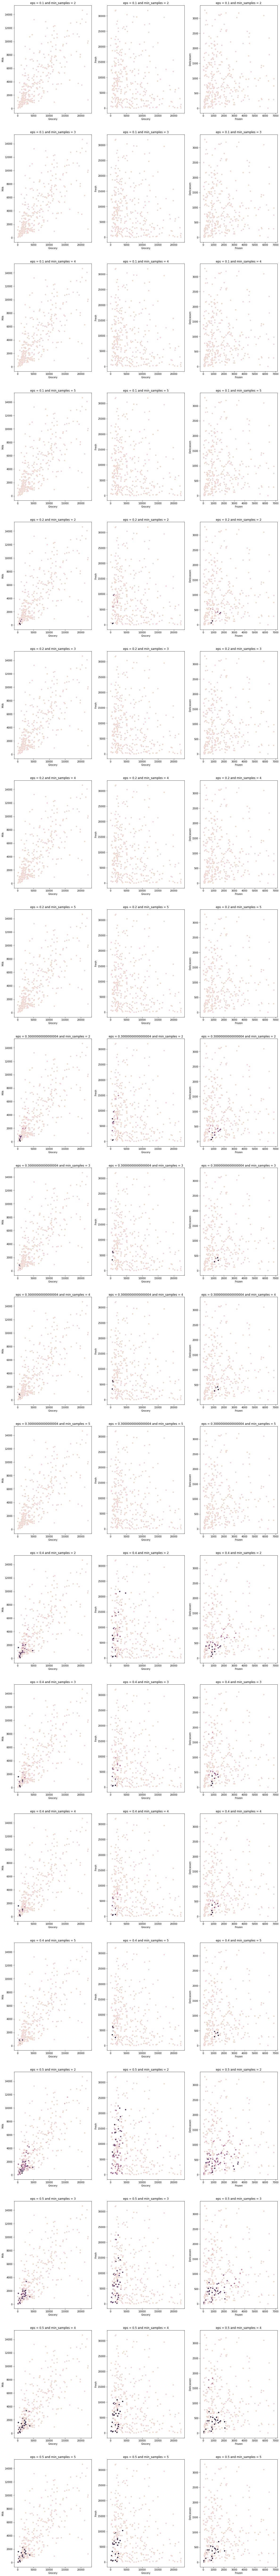

In [289]:
# Test for EPS between 0.1 and 0.5 and min_samples between 2 and 5

dbscan = dict()
k = -1

f, axs = plt.subplots(20, 3, figsize=(20, 200))

for eps in np.arange(0.1, 0.51, 0.1):
    for min_samples in range (2, 5+1):
        k += 1
        dbscan[min_samples + eps] = DBSCAN(eps = eps, min_samples=min_samples)
        dbscan[min_samples + eps].fit(data_scaled)
        for i, cols_pairs in enumerate(cols_pairs_to_visualise):
            sns.scatterplot(data = data, x = cols_pairs[0], y=cols_pairs[1], hue = dbscan[min_samples + eps].labels_, ax=axs[k, i], legend = False)
            axs[k, i].set_title(f'eps = {eps} and min_samples = {min_samples}')

f.tight_layout
f.show()

In [ ]:
# Best combination is with eps = 0.5, getting 2 samples.